[View in Colaboratory](https://colab.research.google.com/github/TonyIssacJames/EIP_public/blob/master/1st_DNN.ipynb)

# **Import Libraries and modules**

In [ ]:
# https://keras.io/
!pip install -q keras
import keras

In [16]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D, BatchNormalization
from keras.layers import Activation
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


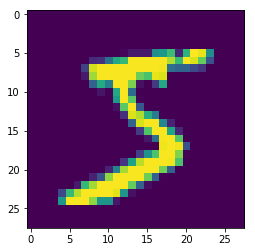

In [18]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [22]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [23]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
from keras.layers import Activation
model = Sequential()

 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(32, 3, 1, input_shape=(28,28,1)))
model.add(SeparableConv2D(32, 1, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3))
#model.add(Convolution2D(16, 3, 3, activation='relu'))
#model.add(Convolution2D(10, 3, 3, activation='relu'))
#model.add(Convolution2D(10, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 1))
#model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(10, 3, 3))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(10, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 1), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (1, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_19 (Separab (None, 26, 28, 32)        67        
_________________________________________________________________
separable_conv2d_20 (Separab (None, 26, 26, 32)        1152      
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_36 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_37 (Activation)   (None, 24, 24, 16)        0         
__________

In [50]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
for i in range(10):
    if i < 4:
        batch_size = 100
    elif i < 8:
        batch_size = 80
    elif i < 10:
        batch_size = 40
    
    model.fit(X_train, Y_train, batch_size=batch_size, epochs=1, verbose=1)
    score = model.evaluate(X_test, Y_test, verbose=0)
    print(score)

Epoch 1/1
60000/60000 [==============================] - 17s 289us/step - loss: 0.3550 - acc: 0.9083
[0.1051182774439454, 0.9698]
Epoch 1/1
60000/60000 [==============================] - 15s 252us/step - loss: 0.0741 - acc: 0.9785
[0.062023917556740346, 0.9808]
Epoch 1/1
60000/60000 [==============================] - 15s 253us/step - loss: 0.0514 - acc: 0.9852
[0.040706188867241144, 0.9876]
Epoch 1/1
60000/60000 [==============================] - 15s 253us/step - loss: 0.0425 - acc: 0.9871
[0.0470337444761768, 0.9844]
Epoch 1/1
60000/60000 [==============================] - 16s 275us/step - loss: 0.0381 - acc: 0.9882
[0.05231958719333634, 0.9832]
Epoch 1/1
60000/60000 [==============================] - 17s 276us/step - loss: 0.0321 - acc: 0.9899
[0.033263630348606965, 0.9895]
Epoch 1/1
60000/60000 [==============================] - 16s 275us/step - loss: 0.0282 - acc: 0.9910
[0.03513504273587605, 0.9889]
Epoch 1/1
60000/60000 [==============================] - 16s 275us/step - loss: 0.

In [52]:
#model.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1)

In [53]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [54]:
print(score)

[0.033115777589788196, 0.9902]


In [55]:
y_pred = model.predict(X_test)

In [56]:
print(y_pred[:9])
print(y_test[:9])

[[3.09364201e-09 2.58472745e-08 2.17090474e-07 2.21111509e-06
  1.50762222e-10 3.26623797e-11 2.41558021e-16 9.99997258e-01
  1.58254487e-09 2.29940980e-07]
 [7.50869076e-05 1.60152958e-05 9.99897957e-01 3.97578415e-10
  9.63031255e-09 1.99294205e-12 8.25575262e-06 1.40844336e-10
  2.71293084e-06 1.04483512e-10]
 [6.03377930e-06 9.99816954e-01 8.86060207e-06 1.36702545e-06
  4.97483088e-05 1.13193591e-05 6.33127274e-05 1.81006235e-05
  2.08020811e-05 3.46524484e-06]
 [9.99881506e-01 1.27353372e-09 8.13172664e-06 3.10463442e-08
  1.38733203e-08 1.04930308e-07 8.14428859e-05 1.16631038e-10
  2.20317797e-05 6.84409451e-06]
 [1.11646592e-09 3.99354959e-11 3.03270475e-09 1.08369286e-11
  9.99991059e-01 2.42991155e-10 4.29085345e-09 5.89837290e-10
  2.23961774e-08 8.96059919e-06]
 [1.16690558e-06 9.99922395e-01 6.26559722e-06 2.81360514e-07
  2.91329397e-05 1.29649425e-06 2.84028056e-06 2.49131626e-05
  8.21672711e-06 3.47757896e-06]
 [1.54572590e-13 3.55898315e-08 1.06179630e-06 6.21545870e

In [57]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: 'conv2d_14'